#### What You Should Be Aiming For
In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods. 

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

➡️ Dataset link 

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation


Instructions

**Part1: supervised learning**

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Prepare your dataset for the modelling phase
Apply Decision tree, and plot its ROC curve
Try to improve your model performance by changing the model hyperparameters

**Part2: unsupervised learning**

Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results

##### Columns Explanation
**Feature/Variable**	**Explanation**

**Wdft_IsGamer** -  Indicates whether the device is a gamer device or not based on its hardware combination.

**Census_IsVirtualDevice** - Identifies a Virtual Machine (machine learning model)

**Census_OSEdition** - Edition of the current OS

**Census_HasOpticalDiskDrive** - True indicates that the machine has an optical disk drive (CD/DVD)

**Firewall** - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.

**SMode** - This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed

**IsProtected** - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates

**OsPlatformSubRelease** - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)

**CountryIdentifier** - ID for the country the machine is located in

In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/HARDEY/Documents/GOMYCODE/Machine Learning/Microsoft_malware_dataset_min.csv")


In [4]:
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,Core,0,1.0,0.0,1.0,th1,177
99996,1,0.0,0.0,Professional,1,1.0,0.0,1.0,rs4,206
99997,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs3,93
99998,0,NaN,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29


In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Customer Purchases History Report", explorative=True)

In [7]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# Imputation: filling them with a mode placeholder
df['Wdft_IsGamer'].fillna(df['Wdft_IsGamer'].mode()[0], inplace=True)
df['Firewall'].fillna(df['Firewall'].mode()[0], inplace=True)
df['SMode'].fillna(df['SMode'].mode()[0], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20419 entries, 0 to 99962
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HasDetections               20419 non-null  int64  
 1   Wdft_IsGamer                20419 non-null  float64
 2   Census_IsVirtualDevice      20250 non-null  float64
 3   Census_OSEdition            20419 non-null  object 
 4   Census_HasOpticalDiskDrive  20419 non-null  int64  
 5   Firewall                    20419 non-null  float64
 6   SMode                       20419 non-null  float64
 7   IsProtected                 20076 non-null  float64
 8   OsPlatformSubRelease        20419 non-null  object 
 9   CountryIdentifier           20419 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 1.7+ MB


In [13]:
%matplotlib inline

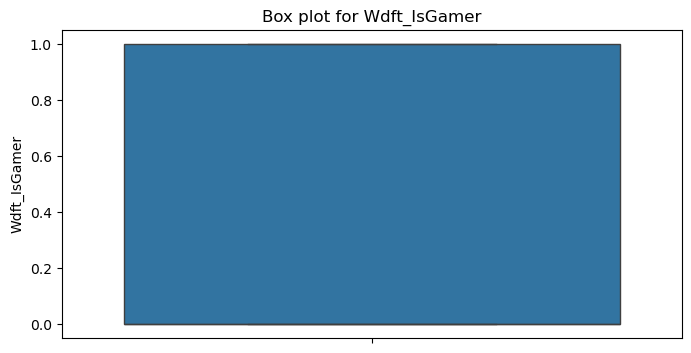

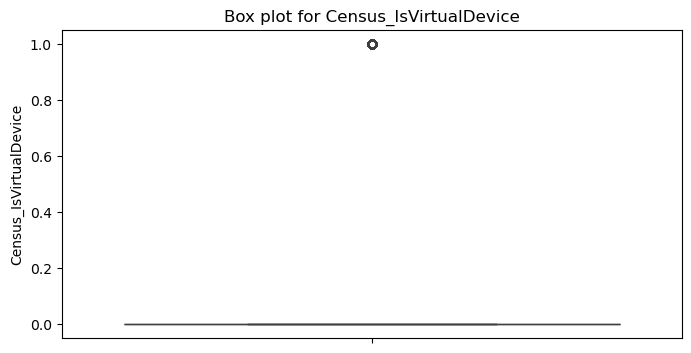

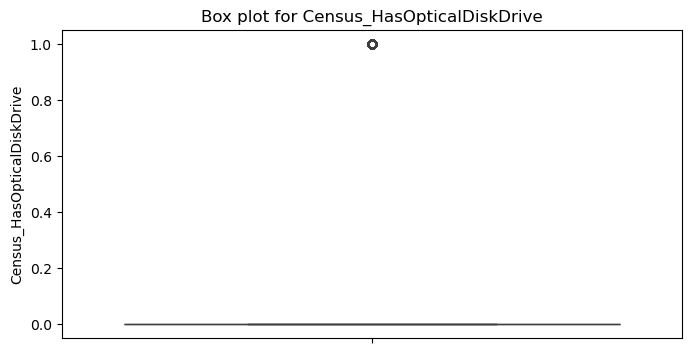

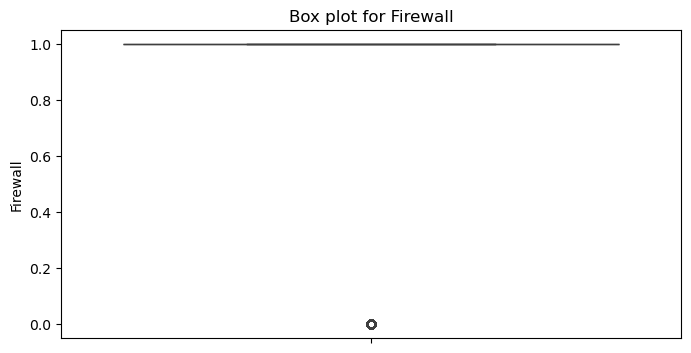

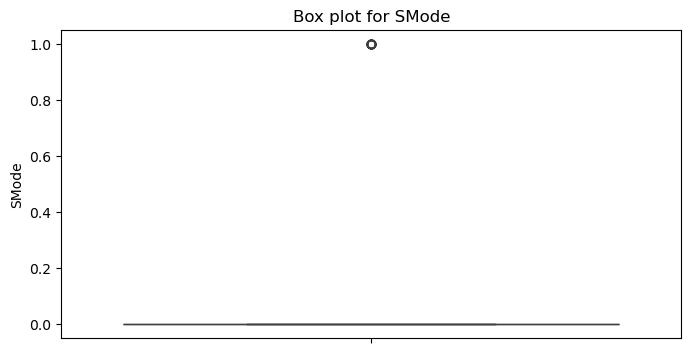

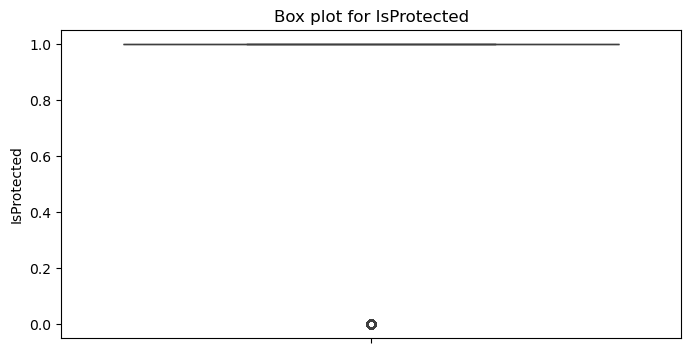

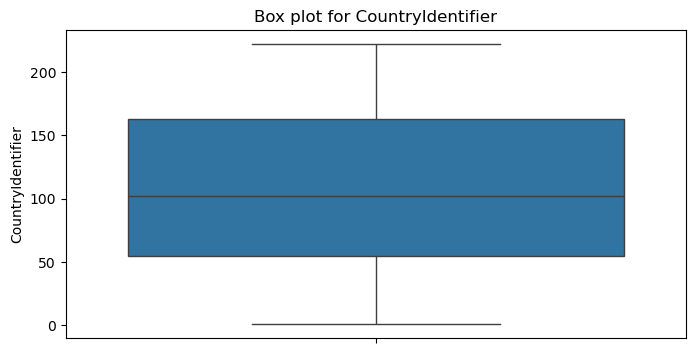

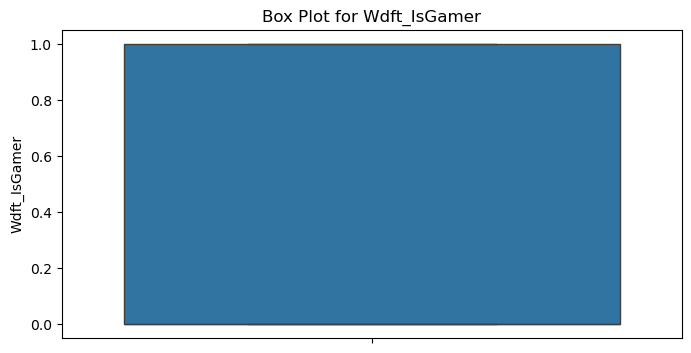

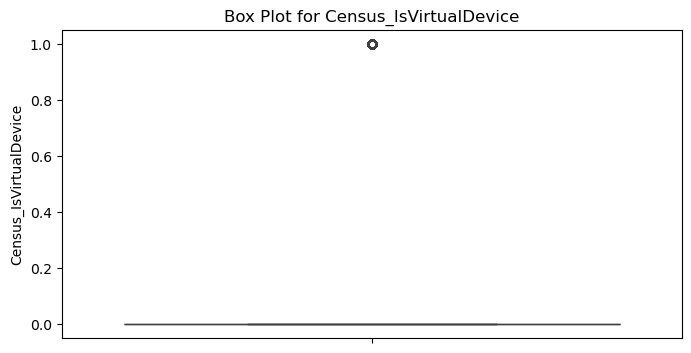

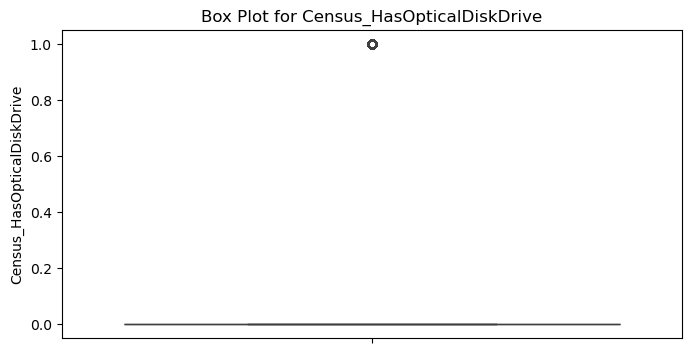

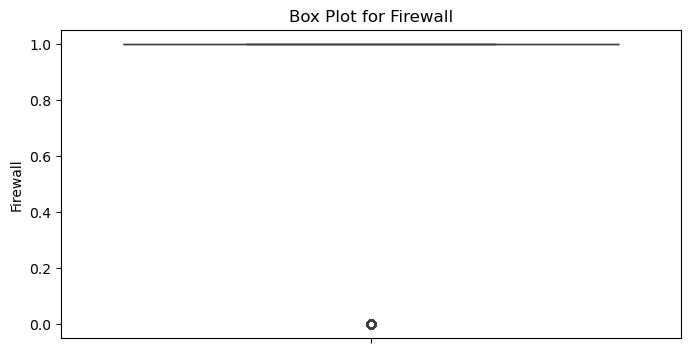

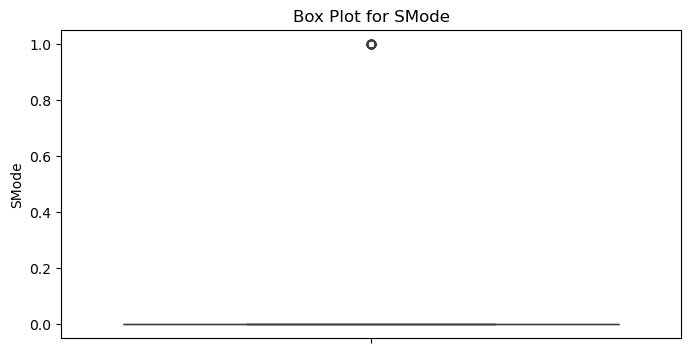

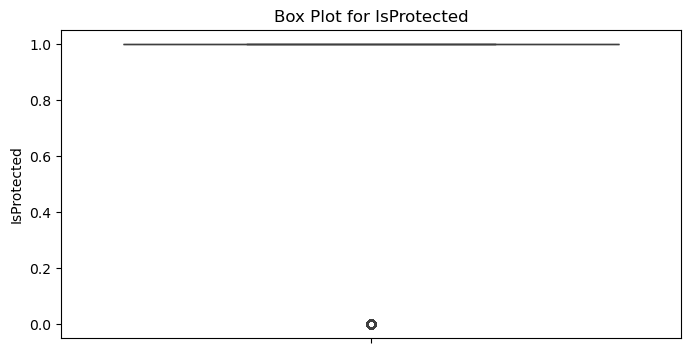

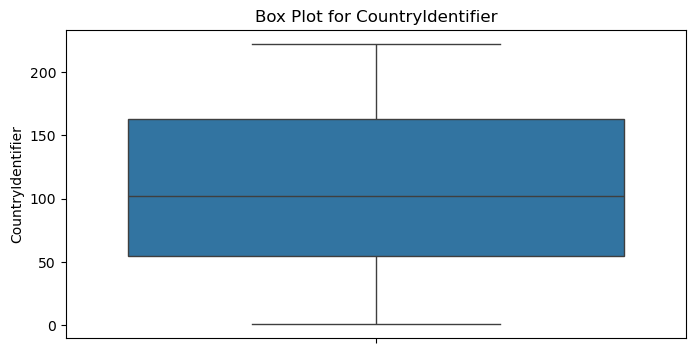

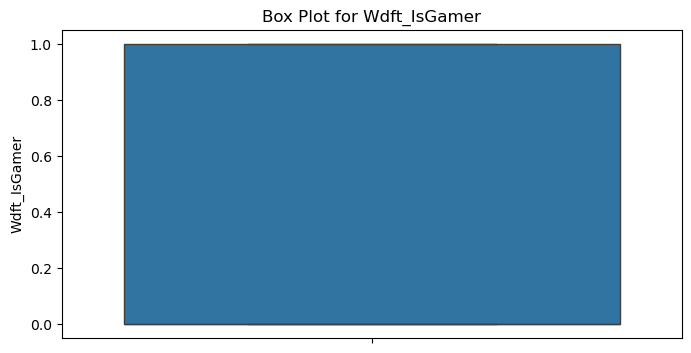

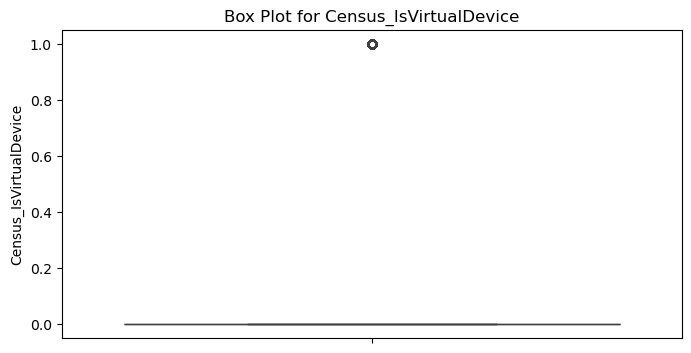

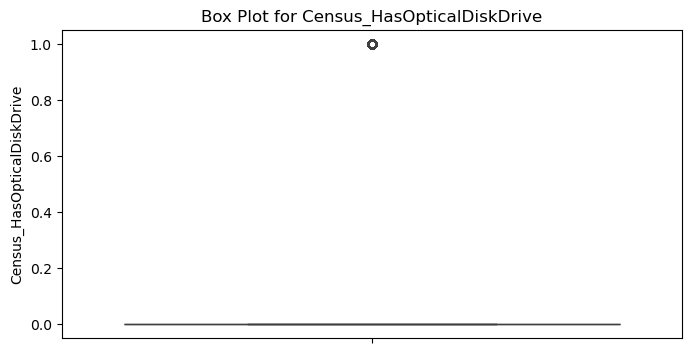

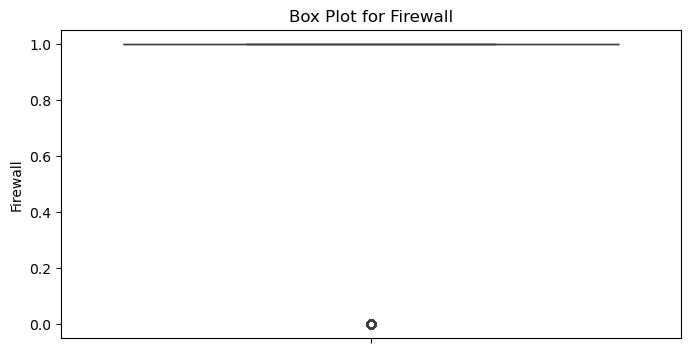

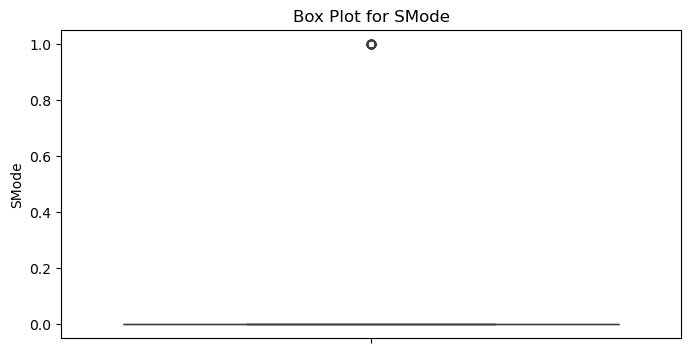

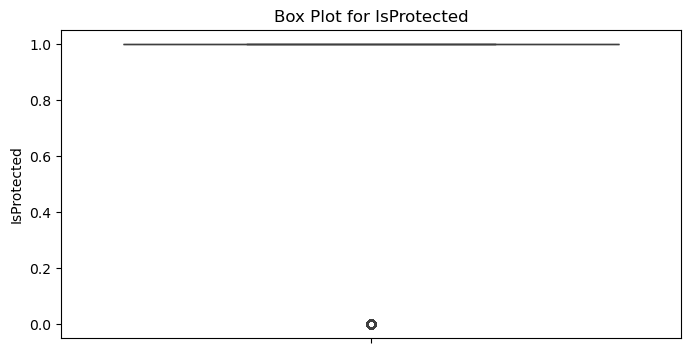

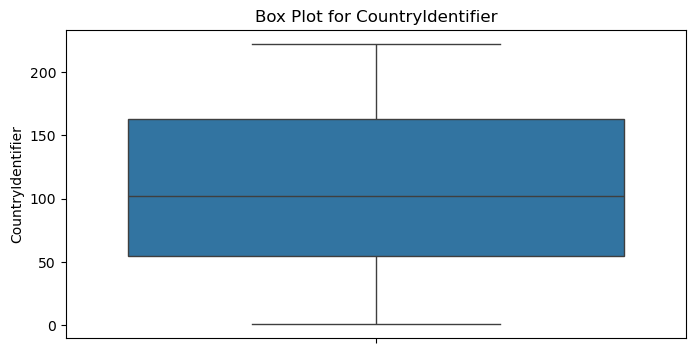

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numeric_columns = ['Wdft_IsGamer', 'Census_IsVirtualDevice', 
                   'Census_HasOpticalDiskDrive', 'Firewall', 
                   'SMode', 'IsProtected', 'CountryIdentifier']

# Plot box plots for each numerical column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [16]:
# Checking for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()

duplicate_rows

3966

In [18]:
# Removing duplicate rows
data_cleaned = df.drop_duplicates()

# Verifying the number of rows after removing duplicates
data_cleaned.shape

(16453, 10)

In [20]:
# Selecting numerical columns to check for outliers
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculating the IQR to detect outliers
Q1 = data_cleaned[numerical_columns].quantile(0.25)
Q3 = data_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers: values outside of 1.5*IQR
outliers = ((data_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | 
            (data_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

outliers

HasDetections                    0
Wdft_IsGamer                     0
Census_IsVirtualDevice         483
Census_HasOpticalDiskDrive    3493
Firewall                      1468
SMode                           32
IsProtected                   3040
CountryIdentifier                0
dtype: int64

In [23]:
# Create a true copy of the DataFrame before modifying it
data_cleaned = data_cleaned.copy()

# Calculate IQR (Interquartile Range)
Q1 = data_cleaned[numerical_columns].quantile(0.25)
Q3 = data_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by capping values using .loc to avoid SettingWithCopyWarning
for col in numerical_columns:
    data_cleaned.loc[:, col] = data_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Census_OSEdition', 'OsPlatformSubRelease']

# Use .loc to explicitly assign transformed values
for col in categorical_columns:
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])

In [25]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data_cleaned.drop('HasDetections', axis=1)
y = data_cleaned['HasDetections']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.impute import SimpleImputer

# Imputing missing values for numerical columns (using median)
num_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
data_cleaned[num_cols] = imputer_num.fit_transform(data_cleaned[num_cols])

# Imputing missing values for categorical columns (using most frequent value)
cat_cols = ['Census_OSEdition', 'OsPlatformSubRelease']
imputer_cat = SimpleImputer(strategy='most_frequent')
data_cleaned[cat_cols] = imputer_cat.fit_transform(data_cleaned[cat_cols])

In [28]:
# Define X (features) and y (target)
X = data_cleaned.drop('HasDetections', axis=1)
y = data_cleaned['HasDetections']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model again
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

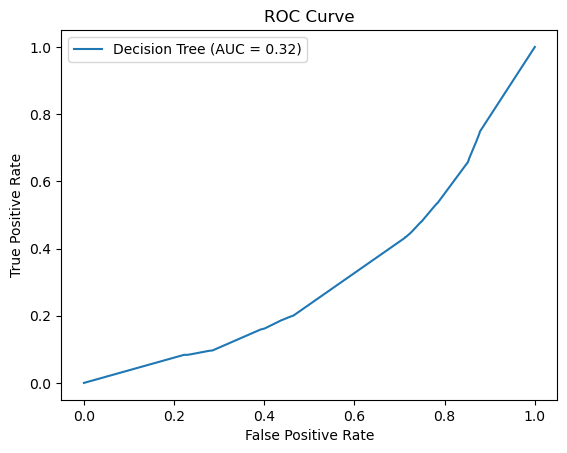

In [29]:
# Predict probabilities
y_probs = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best AUC: {grid_search.best_score_}')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best AUC: 0.5138938966867139


#### Unsupervised

In [31]:
# Drop the target variable 'HasDetections'
X_unsupervised = data_cleaned.drop('HasDetections', axis=1)

c:\Users\HARDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


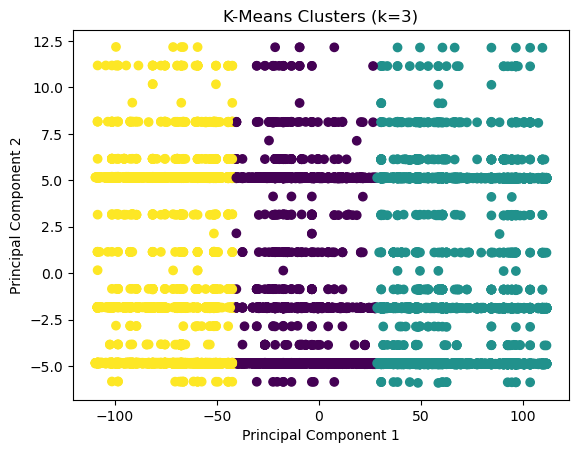

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions using PCA for visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Start with an arbitrary k=3
kmeans.fit(X_pca)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('K-Means Clusters (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

c:\Users\HARDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HARDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HARDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HARDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HARDEY\anaconda3\Lib\site-packages\sklearn\

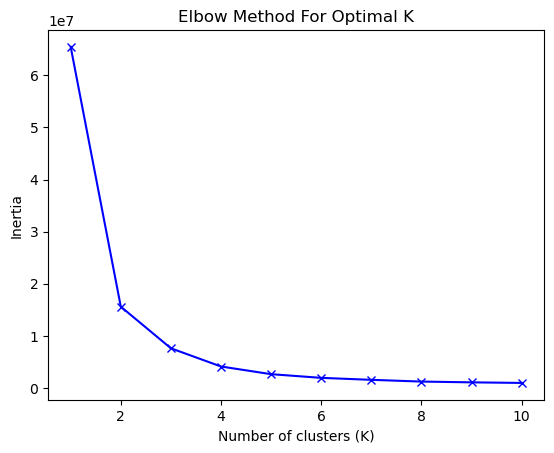

In [33]:
# Use the elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_unsupervised)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters
plt.figure()
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

c:\Users\HARDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


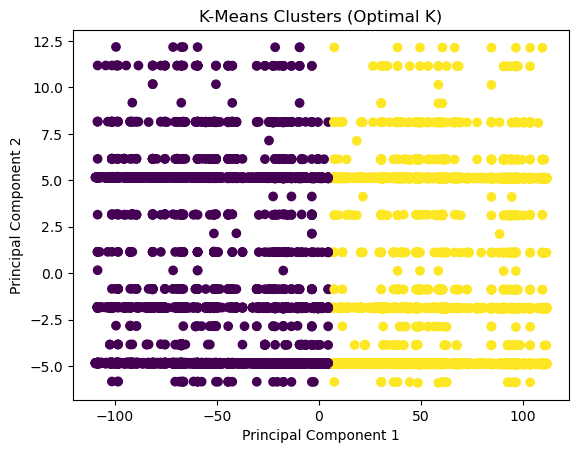

In [34]:
# Re-apply K-means using the optimal K (say K=4 from the elbow method)
kmeans_optimal = KMeans(n_clusters=2, random_state=42)
kmeans_optimal.fit(X_pca)

# Plot the optimized clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', marker='o')
plt.title('K-Means Clusters (Optimal K)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
